In [1]:
import numpy as np
from scipy import stats, optimize
from matplotlib import pyplot as plt

In [2]:
x = np.array([-15,-10,-5,5,10,15])

n_theta = np.array([[80, 52, 66], [76, 78, 85], [65, 59, 57], [481, 465, 519], [504, 468, 448], [152, 154, 136]])
t_theta = np.array([900,400,100,100,400,900])
N_d = n_theta.sum(axis = 1)/(3*t_theta)    # Taking mean of three data values at each angle

x_lin = np.linspace(-15,15,1000)

def f(x, A1, B, w, y0):
    return y0 + A1/(w*np.sqrt(np.pi/4/np.log(2)))*np.exp(-4*np.log(2)*(x-B)**2/w**2)
    #return A1/(np.sin((x-B)/2))**4
    #return A1*np.exp(-(x-B)**2)

popt, pcov = optimize.curve_fit(f, x, N_d, p0 = [5, 3, 1, 0])
perr = np.sqrt(np.diag(pcov))

sigma_n = np.sqrt(N_d/(3*t_theta))

print(x)
print(N_d)
print(sigma_n)
print(popt)

[-15 -10  -5   5  10  15]
[0.07333333 0.19916667 0.60333333 4.88333333 1.18333333 0.1637037 ]
[0.00521157 0.01288302 0.04484541 0.12758439 0.03140241 0.00778659]
[49.96503669  3.24617954  8.85277895  0.1276324 ]


In [3]:
# Arrays with zero

x_with_0 = np.array([-15,-10,-5,0,5,10,15])
n_theta_with_0 = np.array([[80, 52, 66], [76, 78, 85], [65, 59, 57], [483, 433, 456], [481, 465, 519], [504, 468, 448], [152, 154, 136]])
t_theta_with_0 = np.array([900,400,100,60,100,400,900])
N_d_with_0 = n_theta_with_0.sum(axis = 1)/(3*t_theta_with_0)
sigma_n_with_0 = np.sqrt(N_d_with_0/(3*t_theta_with_0))

print(x_with_0)
print(N_d_with_0)
print(sigma_n_with_0)

[-15 -10  -5   0   5  10  15]
[0.07333333 0.19916667 0.60333333 7.62222222 4.88333333 1.18333333
 0.1637037 ]
[0.00521157 0.01288302 0.04484541 0.20578066 0.12758439 0.03140241
 0.00778659]


Gaussian, $$G(x) = y_0 + \frac{A_1}{w \sqrt{np.pi/4\ln(2)}}e^{-4\ln(2)\frac{(x-B)^2}{w^2}}$$

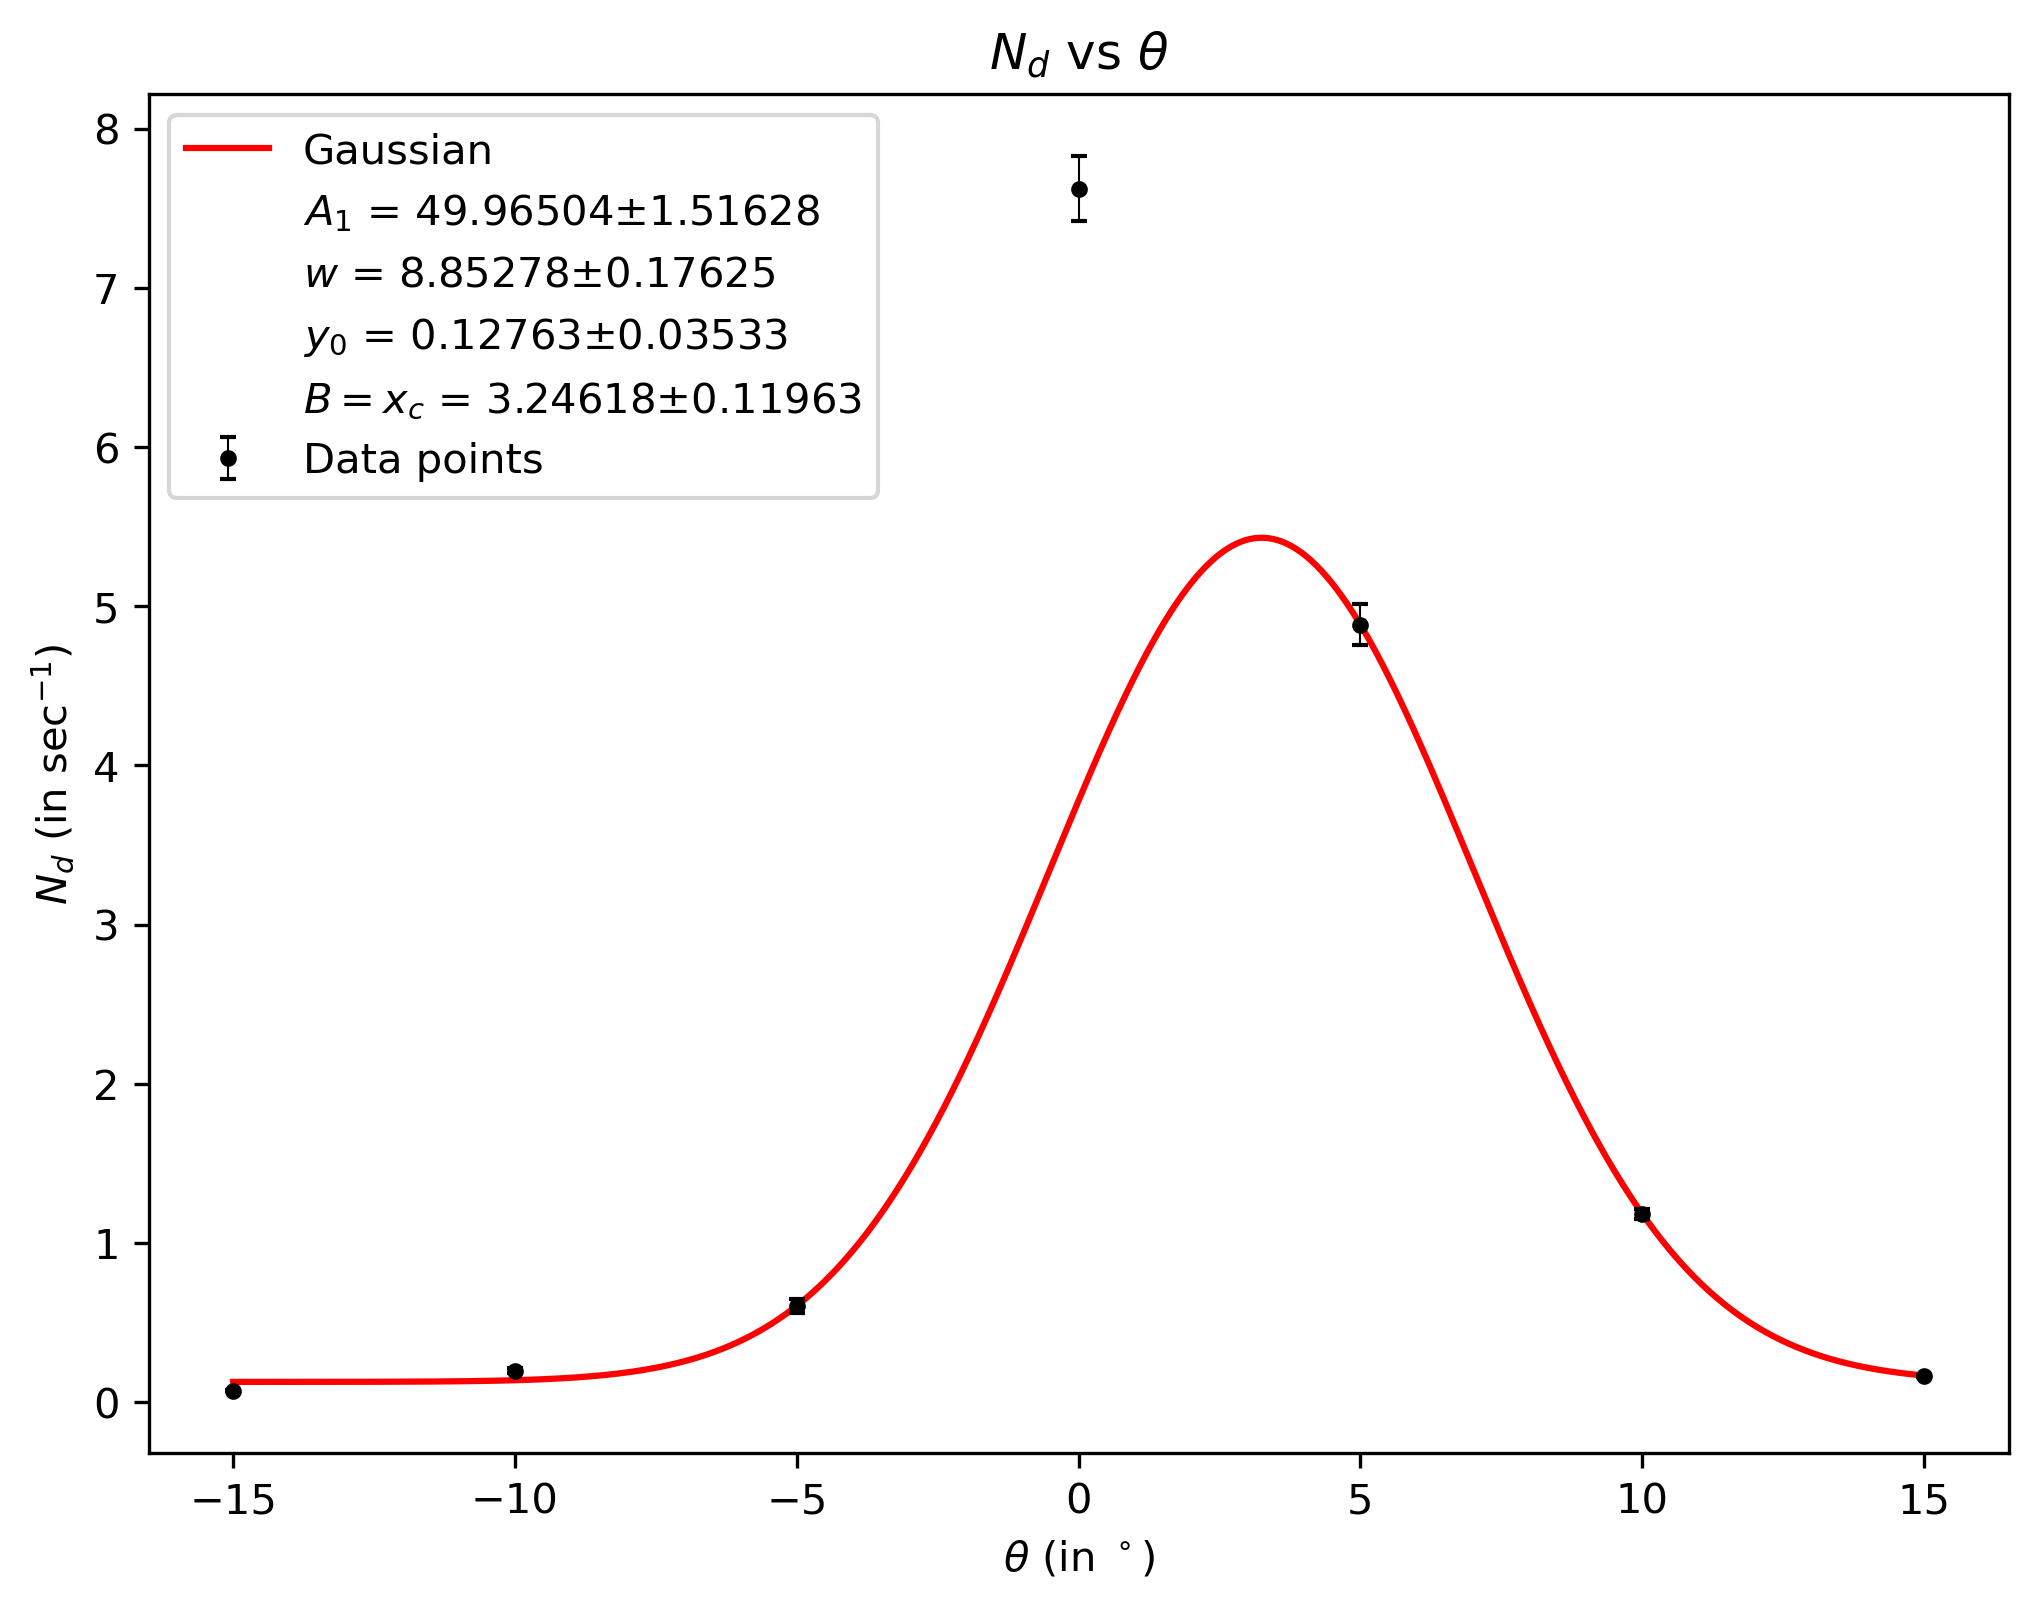

In [4]:
plt.figure(figsize = (8,6), dpi = 300)
plt.title('$N_d$ vs $\\theta$')
plt.ylabel('$N_d$ (in sec$^{-1}$)')
plt.xlabel('$\\theta$ (in $^\circ$)')

plt.plot(x_lin,f(x_lin, *popt),'r-', label="Gaussian")
#plt.scatter(x,N_d)
plt.errorbar(x_with_0, N_d_with_0, yerr=sigma_n_with_0, fmt='.k', capsize=2, elinewidth=0.5, label = "Data points")

plt.plot([], [], ' ', label='$A_1$ = ' + str(np.round(popt[0],5)) + '$\pm$' + str(np.round(perr[0],5)))
plt.plot([], [], ' ', label='$w$ = ' + str(np.round(popt[2],5)) + '$\pm$' + str(np.round(perr[2],5)))
plt.plot([], [], ' ', label='$y_0$ = ' + str(np.round(popt[3],5)) + '$\pm$' + str(np.round(perr[3],5)))
plt.plot([], [], ' ', label='$B = x_c$ = ' + str(np.round(popt[1],5)) + '$\pm$' + str(np.round(perr[1],5)))
'''
plt.plot(x, np.ones(np.size(x))*(func(mean - sigma, A, B, sigma)), label='Within $1\sigma$')
plt.plot(x, np.ones(np.size(x))*(func(mean - 2*sigma, A, B, sigma)), label='Within $2\sigma$')
plt.plot(x, np.ones(np.size(x))*(func(mean - 3*sigma, A, B, sigma)), label='Within $3\sigma$')
'''
plt.legend()

Linear fit, $$y = a+bx \equiv c+mx$$
$$f(\theta) = \frac{1}{\sin^4((\theta - B)/2)}$$

In [15]:
np.abs(2*np.pi*np.sin((np.deg2rad(x_with_0)-np.deg2rad(B)))*sigma_n_with_0)

array([0.01025256, 0.01854769, 0.04041362, 0.07321532, 0.02453421,
       0.02320403, 0.00996628])

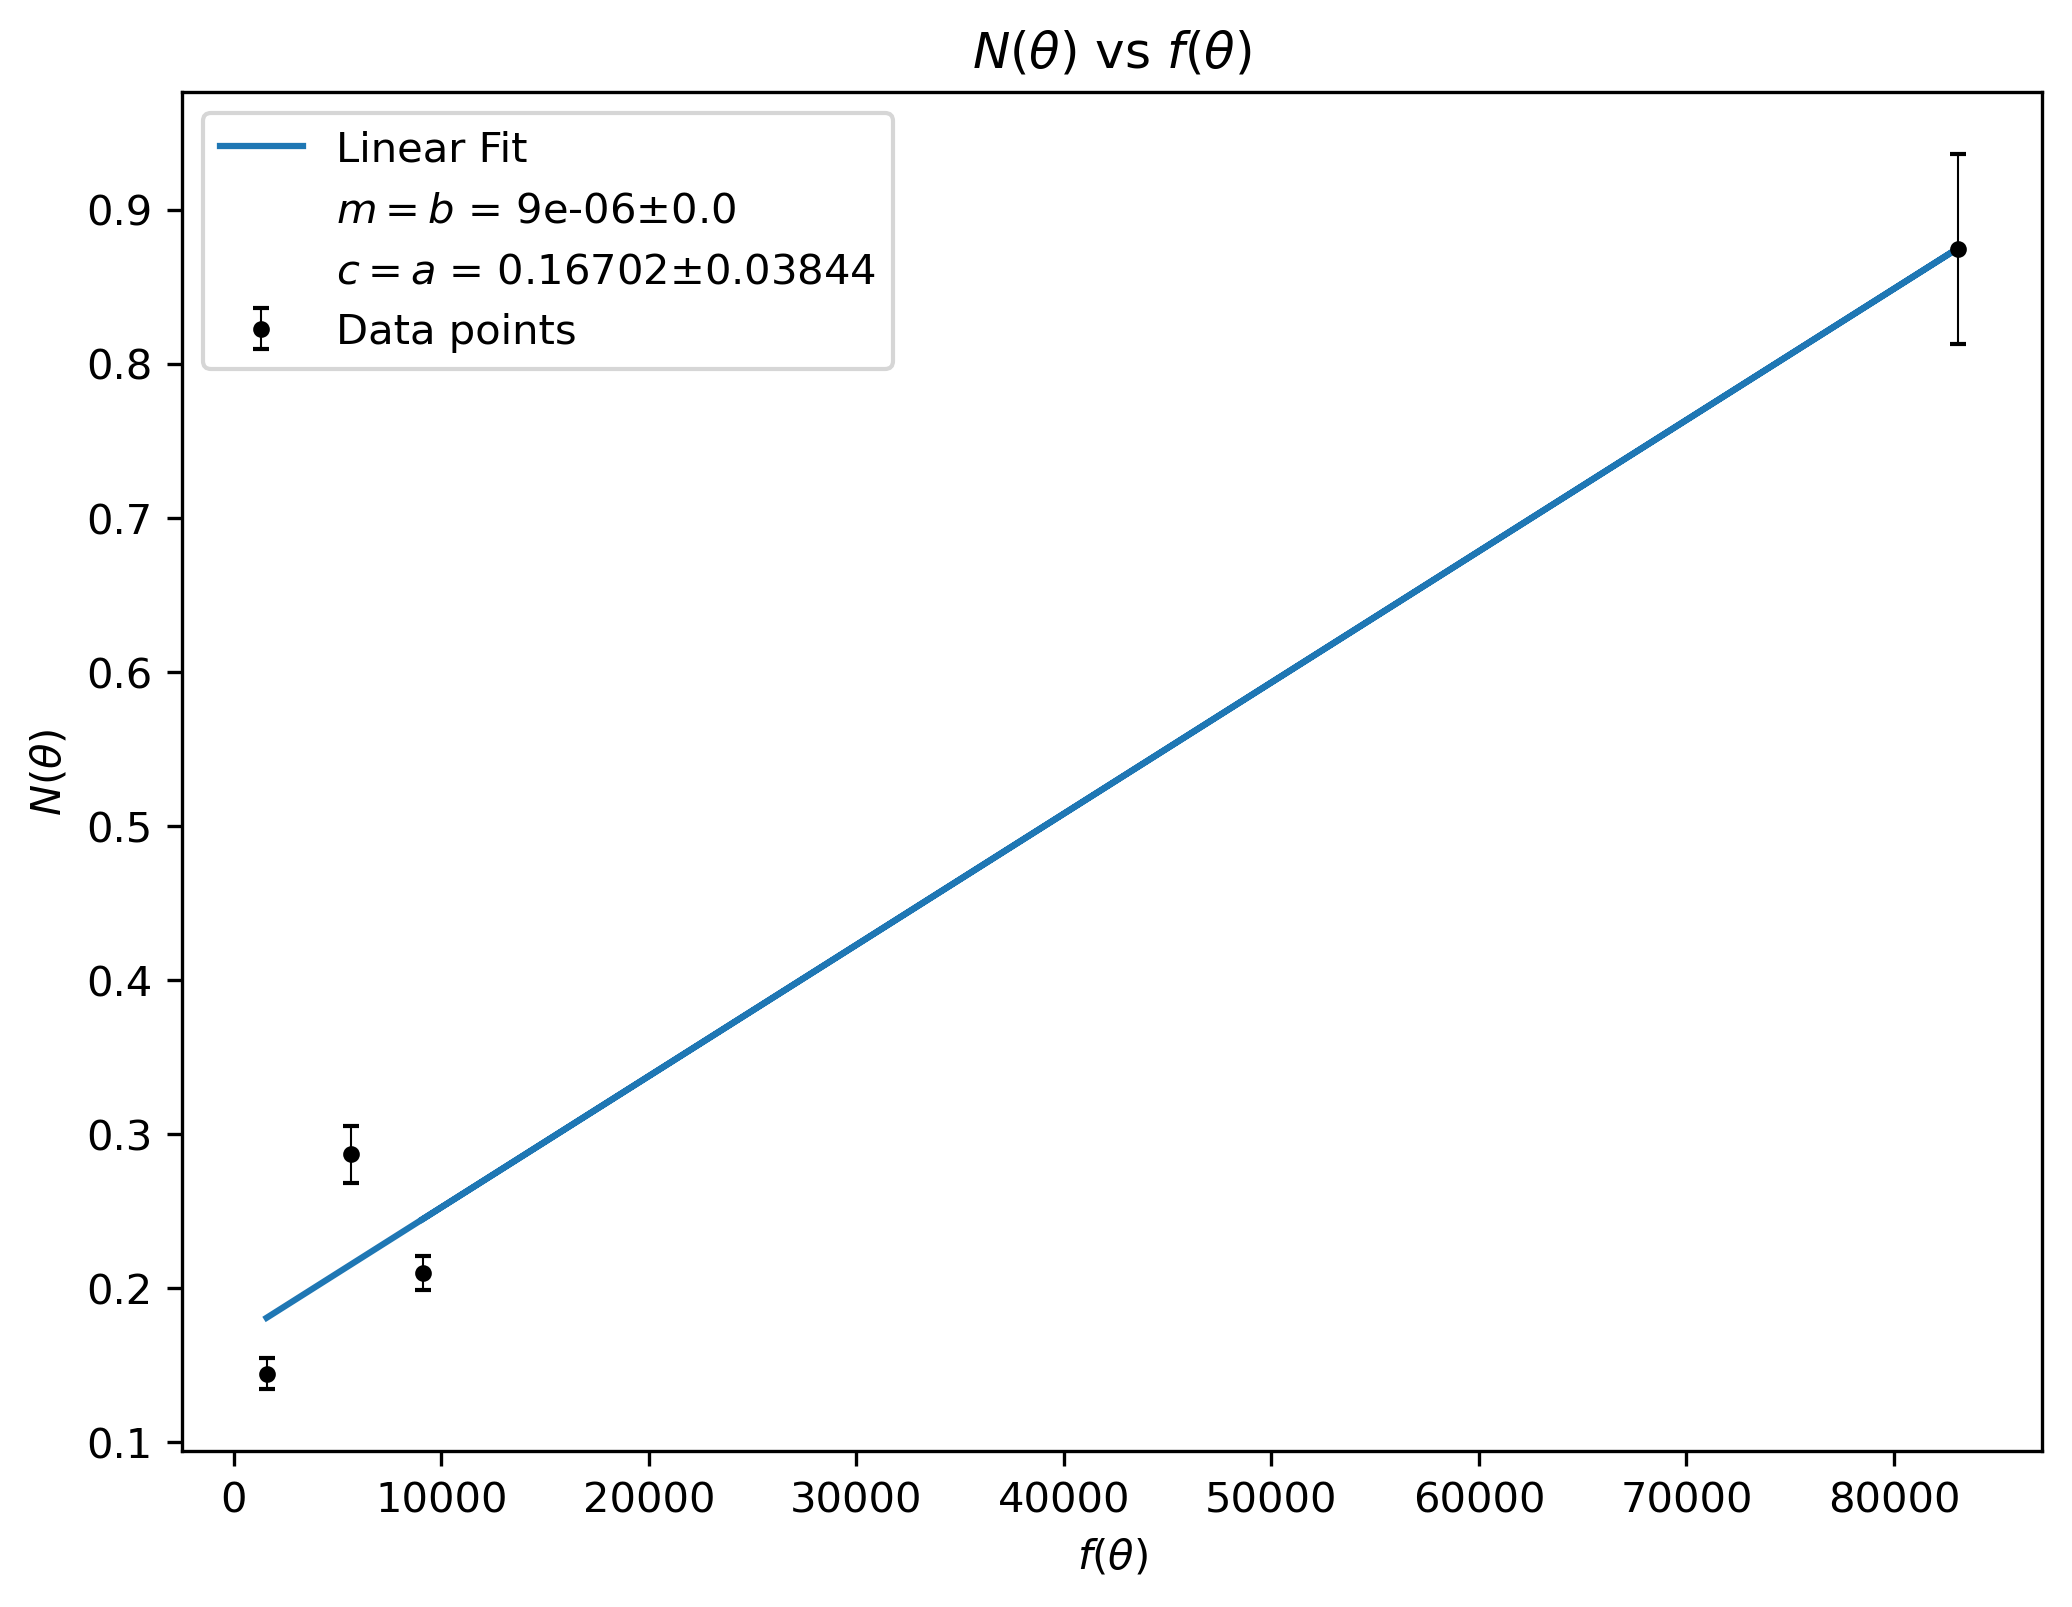

In [11]:
# Linear fit

B = popt[1]

N_space_corrected = np.ones(4)    # Excludes 0,+/- 5 degrees --> Only four points plotted
N_space_corrected[:2] = np.abs(2*np.pi*np.sin((np.deg2rad(x[:2])-np.deg2rad(B)))*N_d[:2])
N_space_corrected[2:] = np.abs(2*np.pi*np.sin((np.deg2rad(x[4:])-np.deg2rad(B)))*N_d[4:])

x2 = np.ones(4)    # Excludes 0,+/- 5 degrees --> Only four points plotted
x2[:2] = 1/(np.sin(np.deg2rad(x[:2]-B)/2))**4
x2[2:] = 1/(np.sin(np.deg2rad(x[4:]-B)/2))**4

def f2(x2, m, c):
    return c+m*x2

popt2,pcov2 = optimize.curve_fit(f2, x2, N_space_corrected, p0=[1,0])

perr2 = np.sqrt(np.diag(pcov2))

N_err = np.ones(4)
N_err[:2] = 2*np.pi*np.sin(np.deg2rad(x[:2]-B))*sigma_n[:2]
N_err[2:] = 2*np.pi*np.sin(np.deg2rad(x[:2]-B))*sigma_n[4:]

plt.figure(figsize=(8,6), dpi = 300)
plt.plot(x2,f2(x2,*popt2), label = "Linear Fit")
#plt.scatter(x2, N_space_corrected)
plt.errorbar(x2, N_space_corrected, yerr=N_err, fmt='.k', capsize=2, elinewidth=0.5, label = "Data points")
plt.title('$N(\\theta)$ vs $f(\\theta)$')
plt.xlabel('$f(\\theta)$')
plt.ylabel('$N(\\theta)$')

plt.plot([], [], ' ', label='$m = b$ = ' + str(np.round(popt2[0],6)) + '$\pm$' + str(np.round(perr2[0],5)))
plt.plot([], [], ' ', label='$c = a$ = ' + str(np.round(popt2[1],5)) + '$\pm$' + str(np.round(perr2[1],5)))

plt.legend()
plt.show()
#plt.xscale('log')